[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dyans\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dyans\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dyans\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dyans\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[("s'pore", 369), ('man', 268), ('tharman', 147), ('george', 131), ('goh', 131), ("m'sia", 123), ('election', 110), ('arrested', 101), ('allegedly', 99), ('police', 88), ('car', 86), ('ng', 84), ('kok', 84), ('song', 84), ('tan', 82), ('kin', 82), ('lian', 82), ('‘', 77), ('presidential', 77), ('open', 72)]


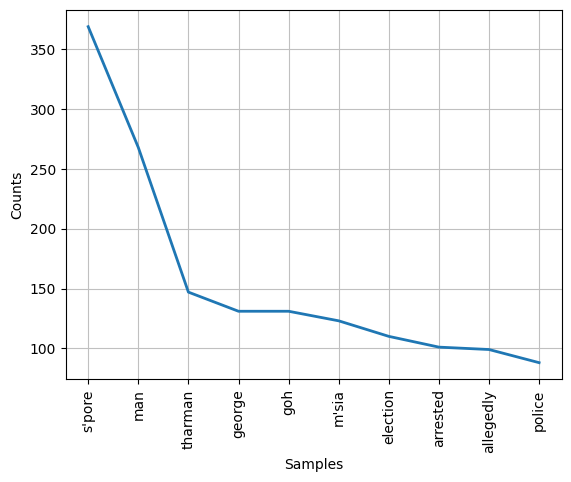

<Axes: xlabel='Samples', ylabel='Counts'>

In [1]:
import nltk
import pandas as pd
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
nltk.download('wordnet')
nltk.download('omw-1.4')
import string

tklist =[]
#edit your own filename in here!
df = pd.read_excel("nltktestxlsx.xlsx", sheet_name='Sheet1')
dfc = df.loc[:,"Titles"]
#print(dfc)

# Step 1: Tokenization
for title in dfc:
    #print(title)
    tktitle=word_tokenize(str(title))
    tktitlep = list(filter(lambda token: token not in string.punctuation, tktitle))
    #print(tktitle)
    tklist.append(tktitlep)
    #print(filtered_title)


#print(tklist)
flat_tklist2 = [item for sublist in tklist for item in sublist]
flat_tklist3 = []
for i in flat_tklist2:
    c = i.lower()
    flat_tklist3.append(c)

#print(flat_tklist3)
#print('Original list', tklist)
#print('Transformed list', flat_tklist)

# Step 2: Stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords
stpwrd = nltk.corpus.stopwords.words('english')
stop_list = ["n't","'s",".","—","&",",","'","'s",":","'","$","n't","2023","aug.","says","’","*"]
stpwrd.extend(stop_list)
#print(stop_list)
filtered_list = []
for word in flat_tklist3:
    if word.lower() not in stpwrd:
        filtered_list.append(word)

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemlist = []
for i in filtered_list:
    lemmed=(lemmatizer.lemmatize(i))
    lemlist.append(lemmed)
    #print(i)
    #print(lemmed)

#print(lemlist)

# print(filtered_list)
#print(flat_tklist)

from nltk.probability import FreqDist
fdist = FreqDist(lemlist)
fdist20=fdist.most_common(20)
print (fdist20)
#frequency_distribution = FreqDist(fdist50)
#frequency_distribution.plot(20, cumulative=False)

#fd = nltk.FreqDist(filtered_list)
#fd.plot(10,cumulative=False)

fd2 = nltk.FreqDist(lemlist)
fd2.plot(10,cumulative=False)

#sent_tokenize(example_string)

#nltk.download("stopwords")
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
#stop_words = set(stopwords.words("english"))
#filtered_list = []
